In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/TFM_Olast_apuestas/DOC

20211213_anali_explora.html  irud.zip
20211213_anali_explora.pdf   resumen_EDA.pdf


In [ ]:
# Descarga y unzip de las imágenes

!unzip drive/MyDrive/TFM_Olast_apuestas/DOC/irud.zip
print("DONE!")

In [ ]:

# z = zipfile.ZipFile("drive/MyDrive/TFM_Olast_apuestas/DOC/irud.zip", "r")

In [ ]:
z.namelist()[0]

'Cor_2005_2006_Alaves_Ath_Bilbao.png'

In [ ]:
# All rellevant imports
import tensorflow as tf

print("TF version   : ", tf.__version__)
# we'll need GPU!
print("GPU available: ", tf.config.list_physical_devices('GPU'))

# keras version is 2.4.3
import keras
print("Keras version   : ", keras.__version__)

TF version   :  2.7.0
GPU available:  []
Keras version   :  2.7.0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator  
from keras.layers import (
    GlobalAveragePooling2D, Multiply, Flatten,
     Dense, Dropout, Conv2D, BatchNormalization, MaxPooling2D,
     Resizing)
from keras.callbacks import EarlyStopping
from keras import Sequential, Model

### EXTRA

from keras.layers import Input
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.optimizers import (Adam, SGD, RMSprop, Adagrad)

from tensorflow.keras.losses import sparse_categorical_crossentropy

In [ ]:
%pylab inline
import cv2
import glob
import os
import matplotlib.pylab as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
im = cv2.imread('irudia/EMPATAR/Cor_2005_2006_Alaves_Ath_Bilbao.png')

print(im.shape)
print(type(im.shape))


(480, 480, 3)
<class 'tuple'>


In [ ]:
im[6][100]

array([  0, 161, 245], dtype=uint8)

In [ ]:
ima =["Cor_2005_2006_Alaves_Ath_Bilbao", "Cor_2005_2006_Alaves_Barcelona", "Cor_2005_2006_Alaves_Cadiz", "Cor_2005_2006_Alaves_Espanol",
      "Cor_2005_2006_Alaves_Santander", "Cor_2005_2006_Alaves_Villarreal", "Cor_2005_2006_Ath_Bilbao_Ath_Madrid", "Cor_2005_2006_Ath_Bilbao_Celta"]

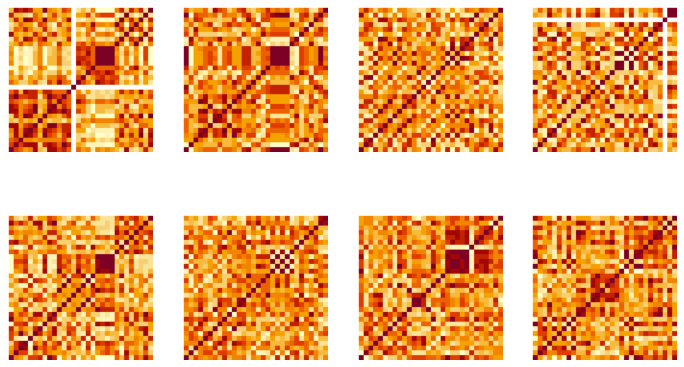

In [ ]:
fig, plot = plt.subplots(2, 4, figsize = (12, 7))
valor=-1
for vec in range(2):
  for i in range(4):
    valor = valor + 1
    plot[vec,i].imshow(imread("".join(["irudia/EMPATAR/",ima[valor],".png"])))
    plot[vec,i].axis('off')



In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)
datos_vali = datagen.flow_from_directory('irudia/',
                                         class_mode='categorical',
                                         batch_size=64,
                                         shuffle=False,
                                         subset='validation')

datos_train = datagen.flow_from_directory('irudia/',
                                          class_mode='categorical',
                                          batch_size=64,
                                          subset='training')

Found 1215 images belonging to 3 classes.
Found 4865 images belonging to 3 classes.


In [ ]:
print(len(datos_vali), len(datos_train))


19 77


In [ ]:
model = Sequential()
model.add(tf.keras.Input(shape=(480,480, 3)))
model.add(Resizing(height = 64, width = 64))
model.add(tf.keras.applications.ResNet50(include_top= False,
                                       weights="imagenet"))
model.add(Flatten()) # converting the data into a 1-dimensional array for inputting it to the next layer
model.add(Dense(8000, activation='relu'))
# model.add(Dense(6000, activation='relu'))
model.add(Dense(5200, activation='relu'))
model.add(Dropout(.5)) # Dropout is a technique where randomly selected neurons are ignored during training. 
# model.add(Dense(3400, activation='relu'))
model.add(Dense(2400, activation='relu'))
model.add(Dense(500, activation='relu'))
# model.add(Dense(150, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model1 = Sequential()
model1.add(tf.keras.Input(shape=(480,480, 3)))
model1.add(Resizing(height = 64, width = 64))
model1.add(tf.keras.applications.ResNet50(include_top= False,
                                       weights="imagenet"))
model1.add(Flatten()) # converting the data into a 1-dimensional array for inputting it to the next layer
model1.add(Dense(10, activation='relu'))
model1.add(Dense(3, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model2 = Sequential()
model2.add(tf.keras.Input(shape=(480,480, 3)))
model2.add(Resizing(height = 64, width = 64))
model2.add(tf.keras.applications.ResNet50(include_top= False,
                                       weights="imagenet"))
model2.add(Flatten())
model2.add(Dense(1024, activation='sigmoid'))
model2.add(Dense(3, activation='softmax'))

In [ ]:
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 64, 64, 3)         0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              8389632   
                                                                 
 dense_7 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 31,980,419
Trainable params: 31,927,299
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# mfit4 = model.fit(datos_train,
#                    validation_data= datos_vali,
#                    epochs=10,
#                    batch_size=32)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), # 0.0001
#               metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss' , patience=4, restore_best_weights=True) # , patience=20

# mfit4 = model.fit(datos_train,
#                    validation_data= datos_vali,
#                    epochs=7,
#                    batch_size=64,
#                    callbacks=[es]) # val_accuracy: 0.4708

In [ ]:
opt = Adam(learning_rate=0.01)
opt1 = SGD(learning_rate=0.01)
opt2 = RMSprop(learning_rate=0.01)
opt3 = Adagrad(learning_rate=0.01)

model1.compile(loss='categorical_crossentropy', optimizer=opt, # 0.0001
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss' , patience=4, restore_best_weights=True) # , patience=20

mfit4 = model1.fit(datos_train,
                  validation_data= datos_vali,
                   epochs=15,
                   batch_size=32,
                   callbacks=[es]) # val_accuracy: 0.4708

NameError: ignored

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
opt2 = RMSprop(learning_rate=0.01)
opt3 = Adagrad(learning_rate=0.01)
opt4 = Adam(learning_rate=0.01)

model2.compile(loss="kullback_leibler_divergence", optimizer=opt, # 0.0001
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss' , patience=4, restore_best_weights=True) # , patience=20

mfit4 = model2.fit(datos_train,
                   validation_data= datos_vali,
                   epochs=20,
                   batch_size=32,
                   callbacks=[es]) # val_accuracy: 0.4708

Epoch 1/20
77/77 [==============================] - 924s 12s/step - loss: 1.2600 - accuracy: 0.3885 - val_loss: 1.0694 - val_accuracy: 0.4708
Epoch 2/20
77/77 [==============================] - 904s 12s/step - loss: 1.2174 - accuracy: 0.3990 - val_loss: 1.1281 - val_accuracy: 0.2840
Epoch 3/20
77/77 [==============================] - 876s 11s/step - loss: 1.1327 - accuracy: 0.4251 - val_loss: 1.3995 - val_accuracy: 0.2840
Epoch 4/20
77/77 [==============================] - 828s 11s/step - loss: 1.3097 - accuracy: 0.3955 - val_loss: 1.2264 - val_accuracy: 0.2840
Epoch 5/20
77/77 [==============================] - 796s 10s/step - loss: 1.1804 - accuracy: 0.4103 - val_loss: 1.1441 - val_accuracy: 0.4708


In [ ]:
datos_vali.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:

y_true = datos_vali.classes
pred = model2.predict_generator(datos_vali, verbose = 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


19/19 - 19s - 19s/epoch - 1s/step


In [ ]:
pred

array([[0.20583278, 0.43836662, 0.35580066],
       [0.20583278, 0.43836662, 0.35580066],
       [0.20583278, 0.43836662, 0.35580066],
       ...,
       [0.20583278, 0.43836662, 0.35580066],
       [0.20583278, 0.43836662, 0.35580066],
       [0.20583278, 0.43836662, 0.35580066]], dtype=float32)

In [ ]:
predicted = np.rint(pred)
y_pred = np.argmax(predicted, axis=1) 

In [ ]:
ima=["EMPATAR","GANAR","PERDER"]

print(f'\nClassification report:\n {classification_report(y_true, y_pred, target_names=ima)}')




Classification report:
               precision    recall  f1-score   support

     EMPATAR       0.25      1.00      0.39       298
       GANAR       0.00      0.00      0.00       572
      PERDER       0.00      0.00      0.00       345

    accuracy                           0.25      1215
   macro avg       0.08      0.33      0.13      1215
weighted avg       0.06      0.25      0.10      1215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

Confusion Matrix
[[298   0   0]
 [572   0   0]
 [345   0   0]]
